#Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, shutil
import numpy as np
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

In [2]:
# Menonaktifkan semua peringatan
warnings.filterwarnings("ignore")

#Connect Gdrive

Dataset ini diunduh dari Kaggle. Untuk menyambungkan Google Colaboratory dengan Kaggle digunakan perantara Gdrive. File kaagle.json disimpan dalam folder Gdrive yang nantinya akan dipanggil (untuk mengamankan keyword dari file .json).

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Buat direktori .kaggle
os.makedirs("/root/.kaggle", exist_ok=True)

# Copy file dari Google Drive
shutil.copy("/content/drive/MyDrive/kaggle/kaggle.json", "/root/.kaggle/kaggle.json")

# Ubah permission-nya
os.chmod("/root/.kaggle/kaggle.json", 600)

In [7]:
!kaggle datasets download -d mahatiratusher/stroke-risk-prediction-dataset-v2

Dataset URL: https://www.kaggle.com/datasets/mahatiratusher/stroke-risk-prediction-dataset-v2
License(s): MIT


In [8]:
!unzip stroke-risk-prediction-dataset-v2.zip -d stroke-risk

Archive:  stroke-risk-prediction-dataset-v2.zip
  inflating: stroke-risk/stroke_risk_dataset_v2.csv  


#Load Dataset

In [9]:
df = pd.read_csv("stroke-risk/stroke_risk_dataset_v2.csv")

In [10]:
df.head()

,age,gender,chest_pain,high_blood_pressure,irregular_heartbeat,shortness_of_breath,fatigue_weakness,dizziness,swelling_edema,neck_jaw_pain,excessive_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_hands_feet,snoring_sleep_apnea,anxiety_doom,stroke_risk_percentage,at_risk
0,22,Male,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,33.3,0
1,52,Male,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,100.0,1
2,63,Female,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,100.0,1
3,41,Male,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,44.5,0
4,53,Male,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,84.8,1


##Data Wrangling

In [11]:
df.shape

(35000, 19)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     35000 non-null  int64  
 1   gender                  35000 non-null  object 
 2   chest_pain              35000 non-null  int64  
 3   high_blood_pressure     35000 non-null  int64  
 4   irregular_heartbeat     35000 non-null  int64  
 5   shortness_of_breath     35000 non-null  int64  
 6   fatigue_weakness        35000 non-null  int64  
 7   dizziness               35000 non-null  int64  
 8   swelling_edema          35000 non-null  int64  
 9   neck_jaw_pain           35000 non-null  int64  
 10  excessive_sweating      35000 non-null  int64  
 11  persistent_cough        35000 non-null  int64  
 12  nausea_vomiting         35000 non-null  int64  
 13  chest_discomfort        35000 non-null  int64  
 14  cold_hands_feet         35000 non-null

In [13]:
df.describe()

,age,chest_pain,high_blood_pressure,irregular_heartbeat,shortness_of_breath,fatigue_weakness,dizziness,swelling_edema,neck_jaw_pain,excessive_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_hands_feet,snoring_sleep_apnea,anxiety_doom,stroke_risk_percentage,at_risk
count,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000
mean,38.630171,0.145857,0.251914,0.098457,0.190057,0.244543,0.190686,0.145943,0.099514,0.097514,0.105971,0.097543,0.143771,0.194571,0.147086,0.098543,44.484054,0.368200
std,11.564128,0.352968,0.434118,0.297936,0.392352,0.429822,0.392847,0.353054,0.299356,0.296661,0.307805,0.296700,0.350863,0.395876,0.354196,0.298052,29.894012,0.482323
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,0.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.900000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.700000,0.000000
75%,46.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64.500000,1.000000
max,86.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,1.000000


#Visualisasi Data

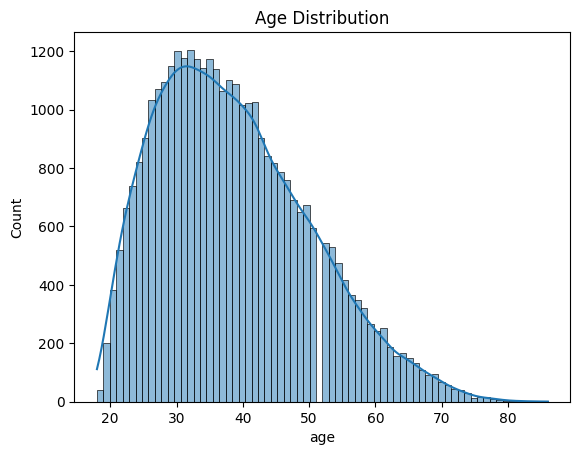

In [16]:
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

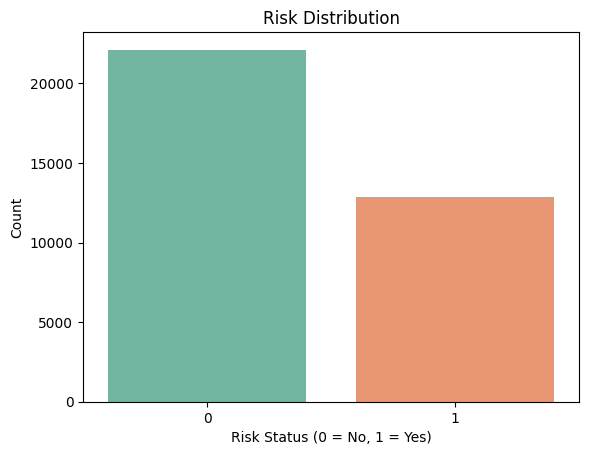

In [18]:
sns.countplot(x='at_risk', data=df, palette='Set2', legend=False)
plt.title('Risk Distribution')
plt.xlabel('Risk Status (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

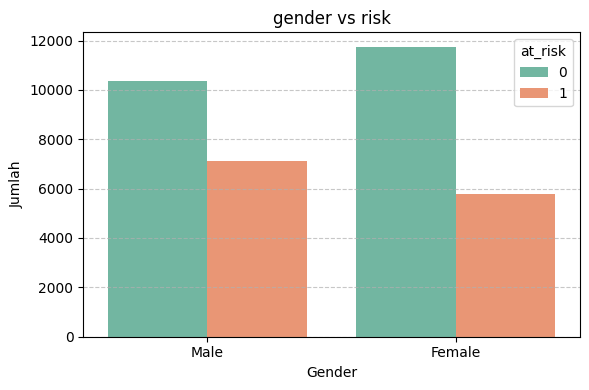

In [21]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='gender', hue='at_risk', palette='Set2')

plt.title('gender vs risk')
plt.xlabel('Gender')
plt.ylabel('Jumlah')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

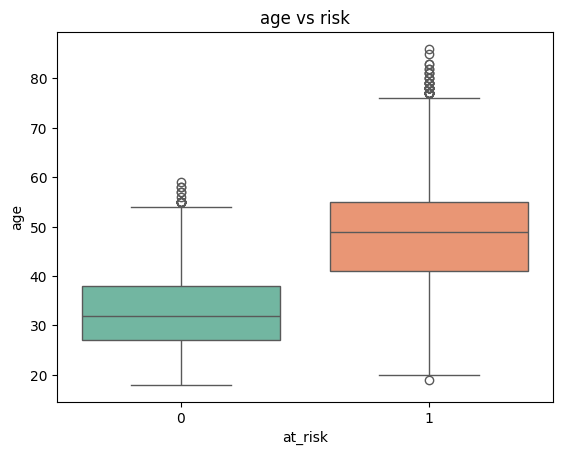

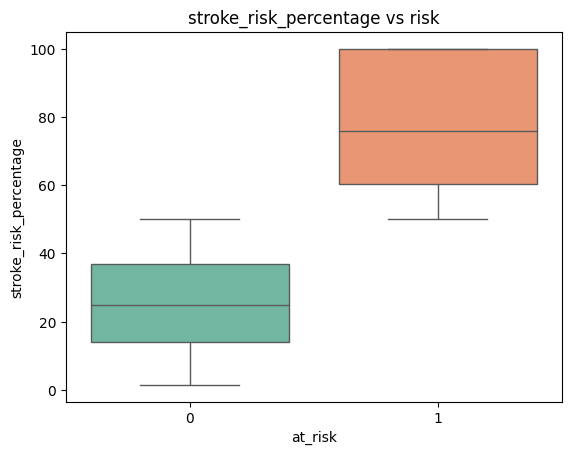

In [20]:
numerical_features = ['age', 'stroke_risk_percentage']
for feature in numerical_features:
    sns.boxplot(data=df, x='at_risk', y=feature, palette='Set2')
    plt.title(f'{feature} vs risk')
    plt.show()

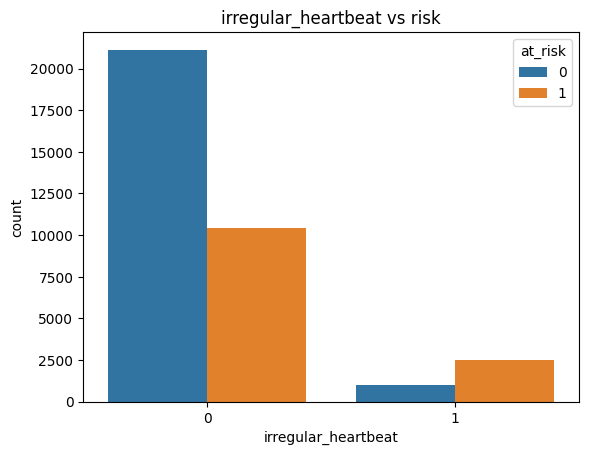

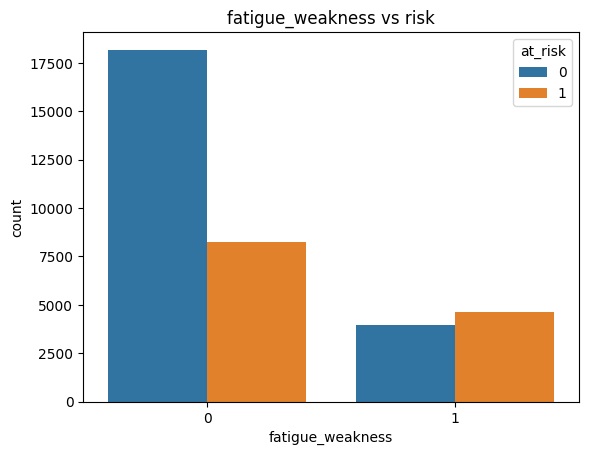

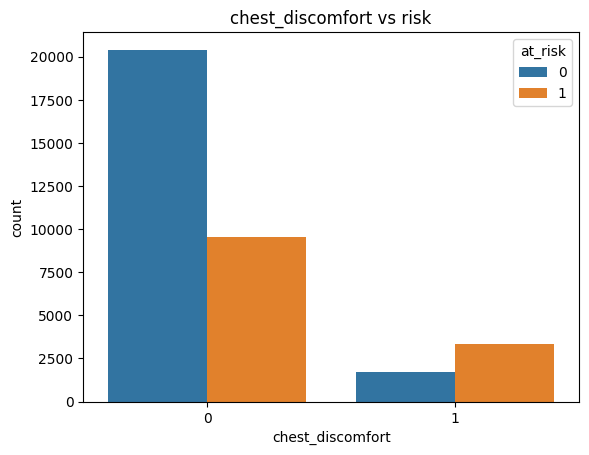

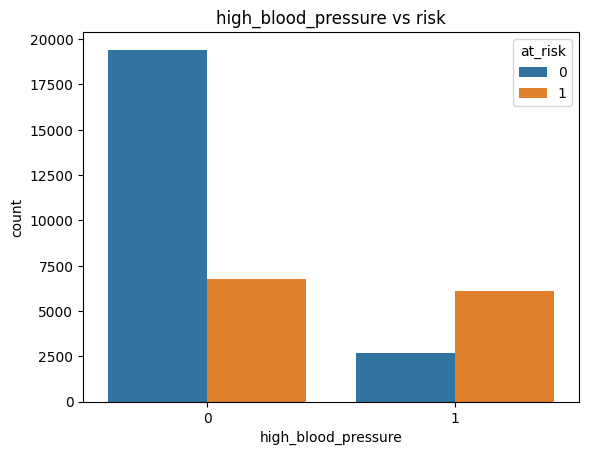

In [22]:
cols = ['irregular_heartbeat', 'fatigue_weakness', 'chest_discomfort', 'high_blood_pressure']

for col in cols:
    sns.countplot(x=col, hue='at_risk', data=df)
    plt.title(f'{col} vs risk')
    plt.show()

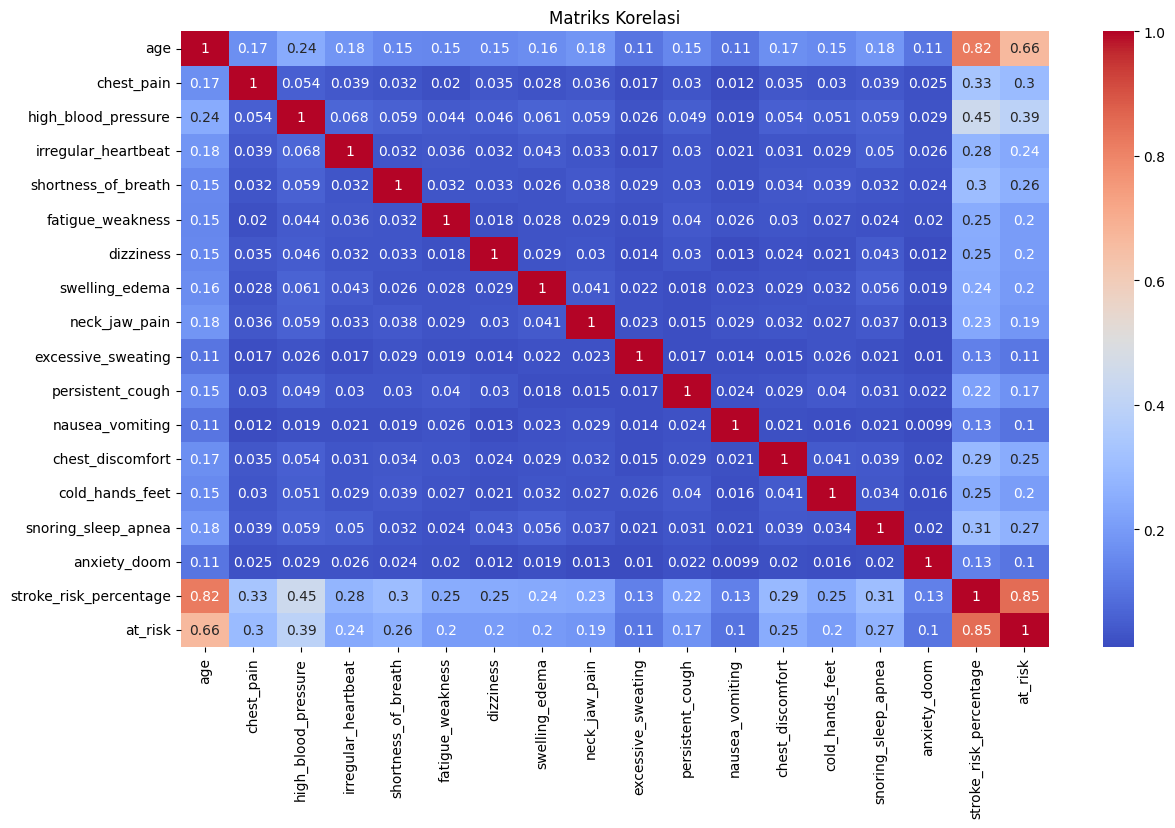

In [23]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Matriks Korelasi")
plt.show()

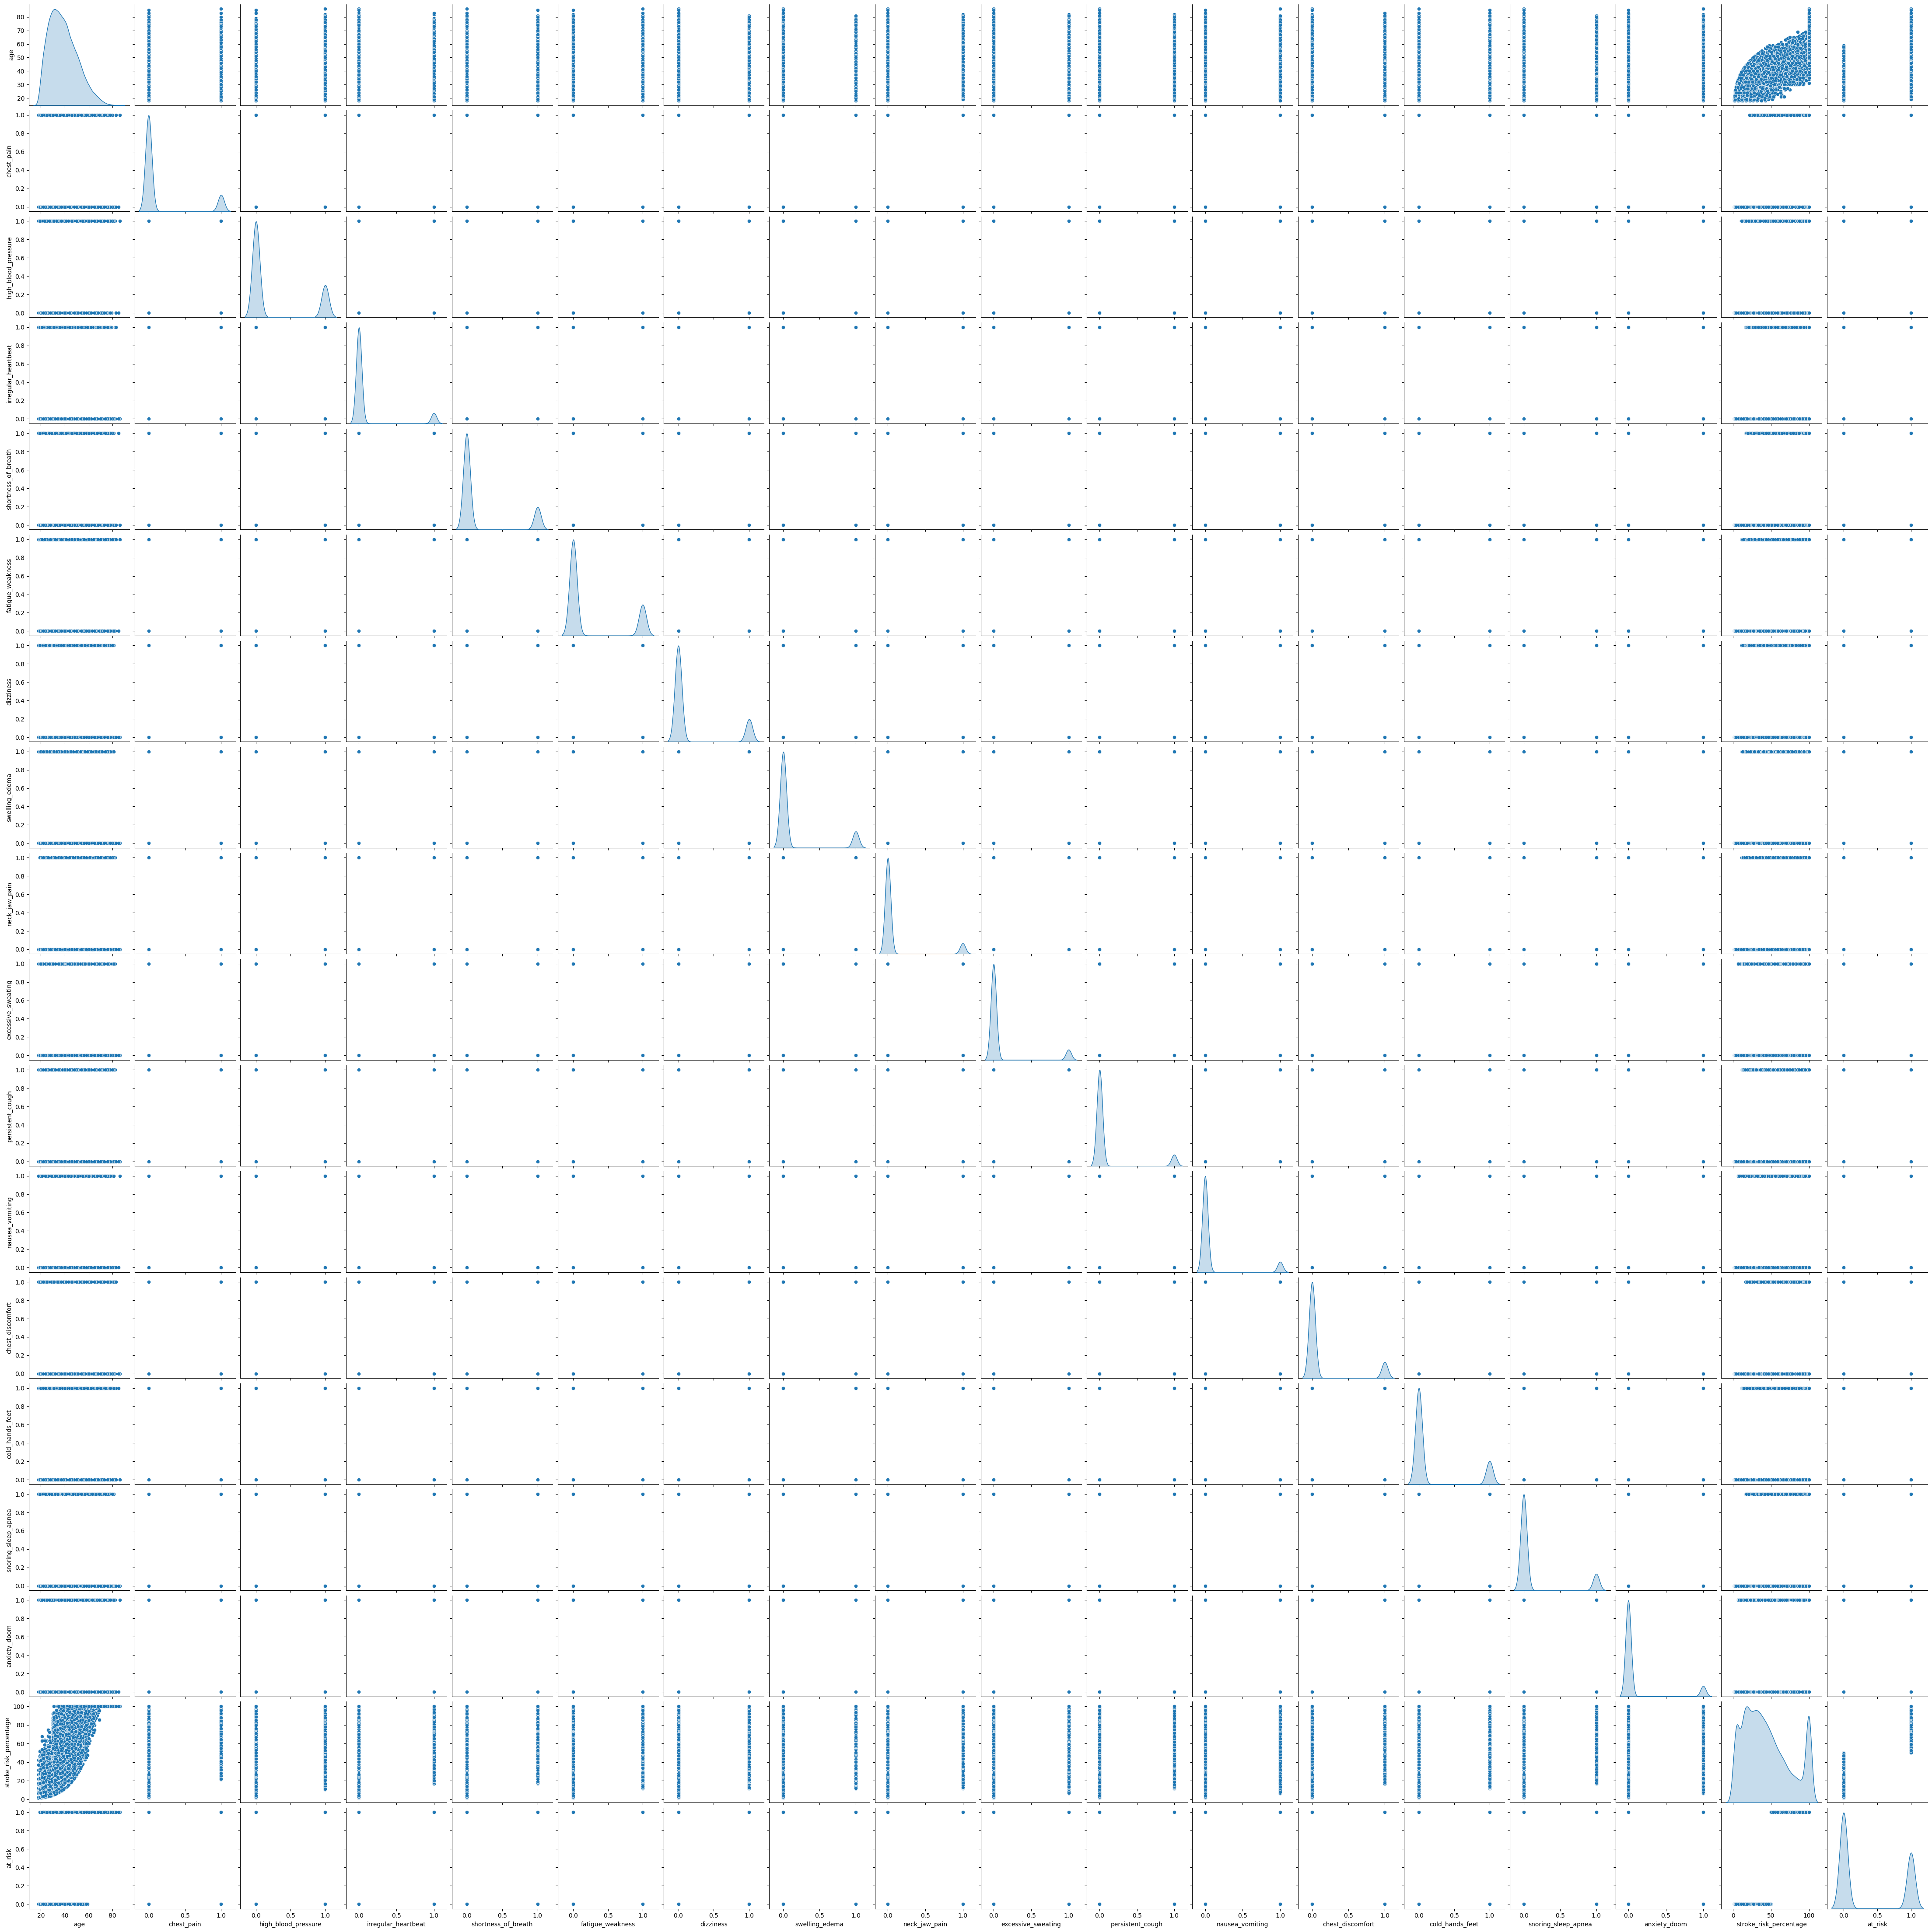

In [24]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df, diag_kind = 'kde')

#Preprocessing Data

###Cek Missing Value

In [25]:
df.isnull().sum()

,0
age,0
gender,0
chest_pain,0
high_blood_pressure,0
irregular_heartbeat,0
shortness_of_breath,0
fatigue_weakness,0
dizziness,0
swelling_edema,0
neck_jaw_pain,0


###Label Encoding

In [26]:
# Label encoding untuk kolom gender
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

In [27]:
print(df['gender'].value_counts())

gender
0    17528
1    17472
Name: count, dtype: int64


###Feature Selection

Kolom **'stroke_risk_percentage'**  mengandung informasi yang sudah terkandung dalam kolom **at_risk** (redundan). Jadi kolom 'stroke_risk_percentage' dihapus guna mengurangi overfitting dan meningkatkan interpretasi model.

In [28]:
df.drop(columns=['stroke_risk_percentage'],inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  35000 non-null  int64
 1   gender               35000 non-null  int64
 2   chest_pain           35000 non-null  int64
 3   high_blood_pressure  35000 non-null  int64
 4   irregular_heartbeat  35000 non-null  int64
 5   shortness_of_breath  35000 non-null  int64
 6   fatigue_weakness     35000 non-null  int64
 7   dizziness            35000 non-null  int64
 8   swelling_edema       35000 non-null  int64
 9   neck_jaw_pain        35000 non-null  int64
 10  excessive_sweating   35000 non-null  int64
 11  persistent_cough     35000 non-null  int64
 12  nausea_vomiting      35000 non-null  int64
 13  chest_discomfort     35000 non-null  int64
 14  cold_hands_feet      35000 non-null  int64
 15  snoring_sleep_apnea  35000 non-null  int64
 16  anxiety_doom         3

In [30]:
df.describe()

,age,gender,chest_pain,high_blood_pressure,irregular_heartbeat,shortness_of_breath,fatigue_weakness,dizziness,swelling_edema,neck_jaw_pain,excessive_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_hands_feet,snoring_sleep_apnea,anxiety_doom,at_risk
count,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000
mean,38.630171,0.499200,0.145857,0.251914,0.098457,0.190057,0.244543,0.190686,0.145943,0.099514,0.097514,0.105971,0.097543,0.143771,0.194571,0.147086,0.098543,0.368200
std,11.564128,0.500007,0.352968,0.434118,0.297936,0.392352,0.429822,0.392847,0.353054,0.299356,0.296661,0.307805,0.296700,0.350863,0.395876,0.354196,0.298052,0.482323
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,46.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,86.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


###Splitting Data

In [31]:
X = df.drop(columns=['at_risk'])
y = df['at_risk']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Modeling

In [34]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_accuracy', 'test_accuracy'],
                      columns=['KNN', 'RandomForest', 'AdaBoost'])

###KNN

In [40]:
knn = KNeighborsClassifier(
    n_neighbors=5,        # jumlah tetangga terdekat
    weights='uniform',    # bobot semua tetangga sama ('distance' jika ingin berbobot jarak)
)

knn.fit(X_train, y_train)
knn_pred_train = knn.predict(X_train)
knn_pred_test = knn.predict(X_test)

models.loc['train_accuracy', 'KNN'] = accuracy_score(y_train, knn_pred_train)
models.loc['test_accuracy', 'KNN'] = accuracy_score(y_test, knn_pred_test)

###Random Forest

In [36]:
# Random Forest
rf = RandomForestClassifier(
    n_estimators=100,       # jumlah pohon
    max_depth=None,         # kedalaman maksimum pohon (None = sampai sempurna)
    random_state=42         # untuk reproducibility
)

rf.fit(X_train, y_train)
rf_pred_train = rf.predict(X_train)
rf_pred_test = rf.predict(X_test)

models.loc['train_accuracy', 'RandomForest'] = accuracy_score(y_train, rf_pred_train)
models.loc['test_accuracy', 'RandomForest'] = accuracy_score(y_test, rf_pred_test)

###AdaBoost

In [37]:
ada = AdaBoostClassifier(
    n_estimators=50,       # jumlah estimator (default: 50)
    learning_rate=1.0,     # learning rate untuk mengurangi kontribusi tiap estimator
    random_state=42        # untuk reproducibility
)

ada.fit(X_train, y_train)
ada_pred_train = ada.predict(X_train)
ada_pred_test = ada.predict(X_test)

models.loc['train_accuracy', 'AdaBoost'] = accuracy_score(y_train, ada_pred_train)
models.loc['test_accuracy', 'AdaBoost'] = accuracy_score(y_test, ada_pred_test)

#Evaluation

In [41]:
print("Hasil Evaluasi Model:")
print(models)

Hasil Evaluasi Model:
                     KNN RandomForest  AdaBoost
train_accuracy  0.933464          1.0  0.933857
test_accuracy   0.903571     0.973286  0.934286


In [42]:
# Classification Report KNN
print("\nKNN Classification Report:")
print(classification_report(y_test, knn_pred_test))


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      4467
           1       0.99      0.74      0.85      2533

    accuracy                           0.90      7000
   macro avg       0.93      0.87      0.89      7000
weighted avg       0.91      0.90      0.90      7000



In [43]:
# Classification Report RF
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_pred_test))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4467
           1       0.99      0.94      0.96      2533

    accuracy                           0.97      7000
   macro avg       0.98      0.97      0.97      7000
weighted avg       0.97      0.97      0.97      7000



In [44]:
# Classification Report AdaBoost
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, ada_pred_test))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      4467
           1       0.96      0.85      0.90      2533

    accuracy                           0.93      7000
   macro avg       0.94      0.92      0.93      7000
weighted avg       0.94      0.93      0.93      7000



In [46]:
accuracy = models.loc[['train_accuracy', 'test_accuracy']].T
accuracy.columns = ['train', 'test']

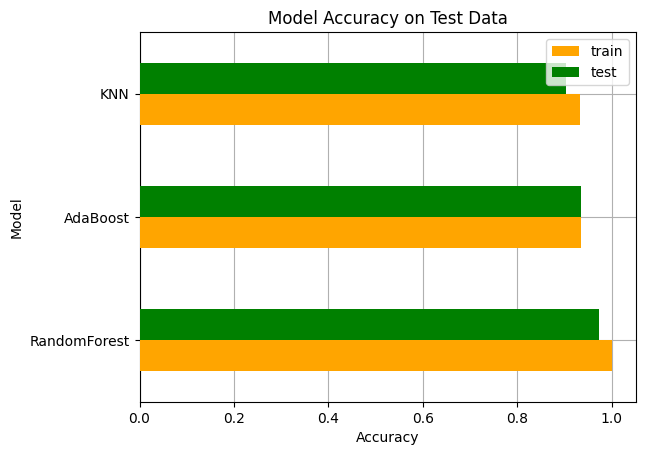

In [47]:
# Membuat figure dan axis untuk plot
fig, ax = plt.subplots()

# Mengurutkan hasil berdasarkan akurasi pada data test dan menampilkan sebagai bar chart horizontal
accuracy.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, color=['orange', 'green'], zorder=3)

# Menambahkan grid di belakang
ax.grid(zorder=0)

# Memberikan label dan judul
ax.set_xlabel('Accuracy')
ax.set_ylabel('Model')
ax.set_title('Model Accuracy on Test Data')

# Menampilkan plot
plt.show()

#Prediction

In [52]:
model_dict = {
    'KNN': knn,
    'RandomForest': rf,
    'AdaBoost': ada
}

# Pilih beberapa data dari X_test untuk diprediksi
prediksi = X_test.iloc[:10].copy()

# Dictionary untuk menyimpan hasil prediksi
pred_dict = {'y_true': y_test[:10]}

# Prediksi menggunakan setiap model yang telah dilatih
for name, model in model_dict.items():
    pred_dict['prediksi_' + name] = model.predict(prediksi)

# Menampilkan hasil prediksi dalam bentuk DataFrame
print(pd.DataFrame(pred_dict))

       y_true  prediksi_KNN  prediksi_RandomForest  prediksi_AdaBoost
17813       1             1                      1                  1
6857        0             0                      0                  0
7672        1             1                      1                  1
9704        1             1                      1                  1
14303       0             0                      0                  0
26304       1             1                      1                  1
3202        0             0                      0                  0
27310       0             0                      0                  0
11215       0             0                      0                  0
20490       0             0                      0                  0
